# Alpha Vantage API

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import csv
import requests

In [2]:
API_KEY = "2U5OG4WFSTOUBHAS"

## Loading data

### Using requests

In [66]:
symbol = 'IBM'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=5min&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

print("Meta Data keys:", list(data['Meta Data'].keys()))
time_series_df = pd.DataFrame(data['Time Series (5min)']).T
time_series_df = time_series_df.astype(float)

time_series_df.head()

Meta Data keys: ['1. Information', '2. Symbol', '3. Last Refreshed', '4. Interval', '5. Output Size', '6. Time Zone']


,1. open,2. high,3. low,4. close,5. volume
2022-07-27 20:00:00,128.84,128.84,128.60,128.60,5188.0
2022-07-27 19:35:00,128.82,128.82,128.82,128.82,4629.0
2022-07-27 19:30:00,128.82,128.82,128.82,128.82,410.0
2022-07-27 18:05:00,129.10,129.10,129.10,129.10,202.0
2022-07-27 17:45:00,129.00,129.00,129.00,129.00,439.0


### Using csv

In [55]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
CSV_URL = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol={symbol}&interval=15min&slice=year1month1&apikey={API_KEY}'


with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

    # use pandas
    time_series_df = pd.DataFrame(columns=my_list[0], data=my_list[1:]).set_index('time')
    time_series_df = time_series_df.astype(float)

    # iterate (over the 5 first rows)
    for row in my_list[:5]:
        print(row)

time_series_df.head()

['time', 'open', 'high', 'low', 'close', 'volume']
['2022-07-27 20:00:00', '128.84', '128.84', '128.6', '128.6', '5188']
['2022-07-27 19:45:00', '128.82', '128.82', '128.82', '128.82', '4629']
['2022-07-27 19:30:00', '128.82', '128.82', '128.82', '128.82', '410']
['2022-07-27 18:15:00', '129.1', '129.1', '129.1', '129.1', '202']


,open,high,low,close,volume
time,,,,,
2022-07-27 20:00:00,128.84,128.84,128.60,128.60,5188.0
2022-07-27 19:45:00,128.82,128.82,128.82,128.82,4629.0
2022-07-27 19:30:00,128.82,128.82,128.82,128.82,410.0
2022-07-27 18:15:00,129.10,129.10,129.10,129.10,202.0
2022-07-27 17:45:00,129.00,129.00,129.00,129.00,439.0


## BTC / ETH

In [115]:
# add outputsize=full to the url to have more than 100 rows (can be heavy)

def get_intraday_crypto_data_df(symbol, market='USD', interval='15min'):
    url = f'https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol={symbol}&market={market}&interval={interval}&apikey={API_KEY}'
    r = requests.get(url)
    data = r.json()
    crypto_df = pd.DataFrame(data[f'Time Series Crypto ({interval})']).T
    crypto_df.columns = ['open', 'high', 'low', 'close', 'volume']
    crypto_df = crypto_df.astype(float)

    return crypto_df


def get_weekly_crypto_data_df(symbol, market='USD'):
    url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_WEEKLY&symbol={symbol}&market={market}&apikey={API_KEY}'
    r = requests.get(url)
    data = r.json()
    crypto_df = pd.DataFrame(data[f'Time Series (Digital Currency Weekly)']).T
    # crypto_df.columns = ['open', 'high', 'low', 'close', 'volume']
    crypto_df = crypto_df.astype(float)
    print(list(data.keys()))

    return crypto_df

In [116]:
market = 'USD'
interval = '15min'

# btc_df = get_intraday_crypto_data_df('BTC', market, interval)
# eth_df = get_intraday_crypto_data_df('ETH', market, interval)


get_weekly_crypto_data_df('BTC', market)

KeyError: 'Time Series Crypto (15min)'

## FX

In [3]:
def get_daily_fx_data_df(from_symbol='USD', to_symbol='EUR'):
    url = f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol={from_symbol}&to_symbol={to_symbol}&apikey={API_KEY}'
    r = requests.get(url)
    data = r.json()
    fx_df = pd.DataFrame(data[f'Time Series FX (Daily)']).T
    fx_df.columns = ['open', 'high', 'low', 'close']
    fx_df = fx_df.astype(float)

    return fx_df

get_daily_fx_data_df()

,open,high,low,close
2022-08-01,0.9792,0.9795,0.9738,0.9740
2022-07-29,0.9806,0.9851,0.9750,0.9778
2022-07-28,0.9799,0.9883,0.9769,0.9807
2022-07-27,0.9880,0.9899,0.9783,0.9801
2022-07-26,0.9782,0.9891,0.9754,0.9880
...,...,...,...,...
2022-03-21,0.9045,0.9080,0.9031,0.9073
2022-03-18,0.9012,0.9085,0.8993,0.9041
2022-03-17,0.9061,0.9080,0.8975,0.9013
2022-03-16,0.9124,0.9129,0.9049,0.9061


<AxesSubplot:ylabel='close'>

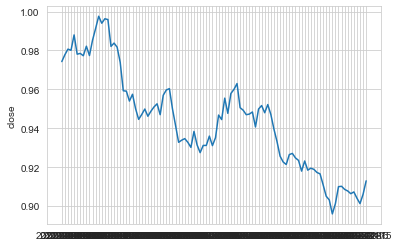

In [6]:
fx_df = get_daily_fx_data_df()

sns.lineplot(data=fx_df['close'])